# Ejercicio de Iteración de Valor

## Instalar los requerimientos

In [17]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Importar dependencias

In [19]:
import gymnasium as gym
import numpy as np
from plot_utils import plot_values

## Para hacer: Arregla el código para desarrollar tu algoritmo de Iteración de Valor

In [67]:
class ValueIteration:
    def __init__(self, env, gamma, pi_error):
        self.env = env  # OpenAI gym environment
        self.gamma = gamma  # Discount factor
        self.pi_error = pi_error  # Policy improvement error
        self.reward = {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 1}

    def train(self):
        """
        Value Iteration Algorithm.

        Returns:
            policy (np.ndarray): optimal policy
            Value  (np.ndarray): optimal value function
        """

        # TODO: Fix the code
        
        # Random policy
        policy = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n

        # Random value function
        V = np.zeros(self.env.observation_space.n)

        
        while True:
            delta = 0
            for s in range(self.env.observation_space.n):
                v = V[s]
                max_value = -np.inf
                for a in range(self.env.action_space.n):
                    value = 0
                    for prob, next_state, reward, done in self.env.P[s][a]:
                        value += prob * (reward + self.gamma * V[next_state])
                    if value > max_value:
                        max_value = value
                V[s] = max_value
                delta = max(delta, abs(v - V[s]))
            if delta < self.pi_error:
                break

        
        for s in range(self.env.observation_space.n):
            q_values = np.zeros(self.env.action_space.n)
            for a in range(self.env.action_space.n):
                for prob, next_state, reward, done in self.env.P[s][a]:
                    q_values[a] += prob * (reward + self.gamma * V[next_state])
            best_action = np.argmax(q_values)
            policy[s] = np.eye(self.env.action_space.n)[best_action]

        return policy, V

    def policy_improvement(self, V):
        """
        Policy improvement.

        Args:
            V (np.ndarray): value function

        Returns:
            policy (np.ndarray): improved policy
        """
        policy = np.zeros([self.env.observation_space.n, self.env.action_space.n])

        for s in range(self.env.observation_space.n):
            q_values = np.zeros(self.env.action_space.n)
            for a in range(self.env.action_space.n):
                for prob, next_state, reward, done in self.env.P[s][a]:
                    q_values[a] += prob * (reward + self.gamma * V[next_state])
            best_action = np.argmax(q_values)
            policy[s] = np.eye(self.env.action_space.n)[best_action]

        return policy

    def get_q_from_v(self, V):
        """
        Get the Q values from the value function.

        Args:
            V (np.ndarray): value function

        Returns:
            Q (np.ndarray): action-value function
        """
        Q = np.zeros([self.env.observation_space.n, self.env.action_space.n])

        for s in range(self.env.observation_space.n):
            for a in range(self.env.action_space.n):
                for prob, next_state, reward, done in self.env.P[s][a]:
                    Q[s][a] += prob * (reward + self.gamma * V[next_state])

        return Q

    def play(self, policy, render=True):
        """
        Play with the given policy.

        Args:
            policy (np.ndarray): policy to play with
            render (bool): whether to render the game or not

        Returns:
            total_reward (float): total reward achieved in this episode
        """
        total_reward = 0.0
        state = self.env.reset()[0]

        # transform state to int, in case it is not
        if not isinstance(state, int):
            state = int(state)


        while True:
            if render:
                self.env.render()
            action = np.argmax(policy[state])
            result = self.env.step(action)
            next_state, reward, done, _ = result[:4]
            total_reward += reward
            state = next_state
            if done:
                break
        return total_reward
    




## Observa a tu agente jugar

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


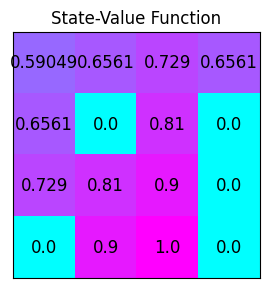

In [68]:
size = 4  # Only 4 and 8 are supported
env = gym.make(
    "FrozenLake-v1",
    desc=None,
    map_name=f"{size}x{size}",
    is_slippery=False,
    render_mode="human",
)
gamma = 0.9
pi_error = 1e-10
value_iteration = ValueIteration(env, gamma, pi_error)
policy, V = value_iteration.train()

value_iteration.play(policy)

plot_values(V, size)



## Verifica que tu solución sea correcta


## Responde a estas preguntas

1. ¿Qué sucede cuando configuras tu entorno con is_slippery=True? ¿Cuál es el efecto en la función de valor? ¿Por qué?
2. ¿Qué sucede con la función de valor cuando cambiamos gamma? ¿Por qué?

Aparece como valores de estado en lugar de movimiento para cada estado (política), de modo que la persona se desplazaría por el siguiente estado que contenga mayor valor entre sus posibilidade. Vemos que está correcto, ya que al estar el entorno como determinista, podemos llegar al estado 15 de las dos maneras. Cambiamos is_slippery=True y imprimimos la política a ver como aparece.

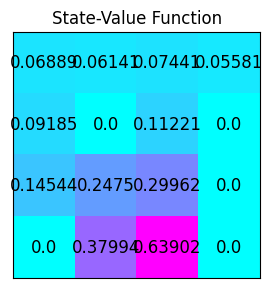

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [63]:
size = 4  # Only 4 and 8 are supported
env = gym.make(
    "FrozenLake-v1",
    desc=None,
    map_name=f"{size}x{size}",
    is_slippery=True,
    render_mode="human",
)
gamma = 0.9
pi_error = 1e-10
value_iteration = ValueIteration(env, gamma, pi_error)
policy, V = value_iteration.train()

value_iteration.play(policy)

plot_values(V, size)
print(policy)

Ahora ha cambiado a un entorno estocático. Vemos como han cambiado los valores de estado, indicando el camino donde se obtiene más valor para los siguientes estados. La política se ha impreso de una forma que no esperaba, donde las filas son los estados y las columnas son los movimientos, en este orden (izquierda, abajo, derecha, arriba). Comprobamos que efectivamente hemos obtenido la política óptima. Ahora cambiemos el formato de salida de la política y además cambiamos el valor de gamma a 0.1.

In [64]:
# política antes de la modificación de gamma

def visualize_policy(policy):
    policy_grid = np.argmax(policy, axis=1).reshape((size, size))
    
    print("Política óptima:")
    print(policy_grid)

visualize_policy(policy)

Política óptima:
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


Donde:
0: izquierda, 1: abajo, 2: derecha, 3: arriba. \
Y efectivamente, vemos que la política es la óptima.

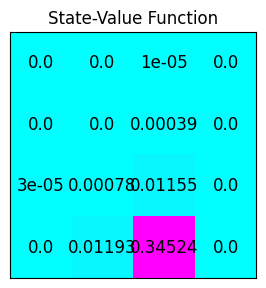

Política óptima:
[[1 3 2 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


In [65]:
size = 4  # Only 4 and 8 are supported
env = gym.make(
    "FrozenLake-v1",
    desc=None,
    map_name=f"{size}x{size}",
    is_slippery=True,
    render_mode="human",
)
gamma = 0.1
pi_error = 1e-10
value_iteration = ValueIteration(env, gamma, pi_error)
policy, V = value_iteration.train()

value_iteration.play(policy)

plot_values(V, size)
visualize_policy(policy)

Vemos una pequeña diferencia, pero que lo marca todo. Y es que el modelo sigue buscando el siguiente estado que máximiza el valor. Pero no busca para los estados próximos, tan solo el siguiente. Por tanto, vemos como en el estado 0, no le importa si se desplaza hacia abajo o a la derecha, ya que ambas son igualmente válidas. Si fuesemos hacia abajo, volveríamos como la política anterior, pero se observa como en el estado 9 indica ir hacia abajo, como es evidente, pero le da casi el mismo valor acabar abajo que en la derecha, cuando evidentemente es peor ir hacia la derecha.